## Center for Justice Innovation: Research and Data Associate Data Task: 2 ANALYSIS

#### Prompt

<b>Background</b>

The attached datasets are for a theoretical alternative sentencing program for individuals 15 and older who were court-mandated either to group sessions or individual counseling services (or both) with a nonprofit agency.

<b>Instructions</b>

Based on the data, please tell us, grouped by people younger than 25 and those 25 and older (<b>at the time their case opened</b>):
1.	How many individuals attended at least one individual counseling session in 2019?
2.	How many individuals attended at least one group counseling session in 2019?
3.	Of the individuals who attended at least one individual counseling session, what is the average number of individual counseling sessions attended by year?
4.	How has the average individual counseling sessions attended changed between 2018 and 2019?
5.	Among closed cases, which individual had the highest group counseling session attendance rate, excluding cancelled sessions?
6.	Among closed cases, identify the individual(s) that had an individual counseling session attendance rate (excluding cancelled sessions) in the bottom quartile.
7.	Explain how you would approach summarizing or visually presenting the above findings to program staff.

Please summarize the steps you used to get the above information (including any data cleaning needed) and list any lingering questions and key findings. Please include any definitions or assumptions you made to complete the task.


#### 08/01/2023 at 16:00 CEST
* Read in interim data, "data.csv"
* analyze data
* Export processed data

### NOTE: Access the accompanying Google Doc: https://docs.google.com/document/d/1KlWVkjx1sDyvUm6yZoa13OFqU4YUC3WW4-6VmCHdw9g/edit?usp=sharing

In [1]:
# import necessary packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
#from datetime import datetime

In [2]:
# change working directory to a specified directory
os.chdir('../')
print("Directory Changes")

# Get current working directory
cwd = os.getcwd()
print("Current working directory is:", cwd)

Directory Changes
Current working directory is: C:\Users\Carol\Documents\Work\WorkOpportunities\CJI\cji-analysis


### 0. Read in Data

In [3]:
# read in data, 'data.csv'
data = pd.read_csv("data/interim/data.csv")

In [4]:
# gain insight into 'data'
data.shape 

(177, 26)

In [5]:
# gain insight into 'data'
data

,First Name,Last Name,Date of Birth,Person ID,Case Opened Date,Case Closed Date,Program,Program Date,Program Attendence,age,...,Program Attended,Program Not Attended,Program Cancelled,program_year_group,2018 Program,2019 Program,case_status_group,Case Not Confirmed Closed,Case Confirmed Closed,count
0,Tweety,Bird,1987-05-09,1000010,2019-05-09,2019-10-16,Individual Counseling,2019-10-02,Cancelled,32,...,0,0,1,2019 Program,0,1,Case Confirmed Closed,0,1,1
1,Tweety,Bird,1987-05-09,1000010,2019-05-09,2019-10-16,Individual Counseling,2019-10-07,Cancelled,32,...,0,0,1,2019 Program,0,1,Case Confirmed Closed,0,1,1
2,Tweety,Bird,1987-05-09,1000010,2019-05-09,2019-10-16,Group Class,2019-09-13,Y,32,...,1,0,0,2019 Program,0,1,Case Confirmed Closed,0,1,1
3,Tweety,Bird,1987-05-09,1000010,2019-05-09,2019-10-16,Group Class,2019-09-21,Y,32,...,1,0,0,2019 Program,0,1,Case Confirmed Closed,0,1,1
4,Tweety,Bird,1987-05-09,1000010,2019-05-09,2019-10-16,Group Class,2019-09-29,Y,32,...,1,0,0,2019 Program,0,1,Case Confirmed Closed,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Ralph,Phillips,1999-09-29,1000220,2019-05-12,2019-09-01,Group Class,2019-08-20,Y,19,...,1,0,0,2019 Program,0,1,Case Confirmed Closed,0,1,1
173,Ralph,Phillips,1999-09-29,1000220,2019-05-12,2019-09-01,Individual Counseling,2019-10-26,Cancelled,19,...,0,0,1,2019 Program,0,1,Case Confirmed Closed,0,1,1
174,Ralph,Phillips,1999-09-29,1000220,2019-05-12,2019-09-01,Individual Counseling,2019-05-18,Y,19,...,1,0,0,2019 Program,0,1,Case Confirmed Closed,0,1,1
175,Ralph,Phillips,1999-09-29,1000220,2019-05-12,2019-09-01,Individual Counseling,2019-07-12,N,19,...,0,1,0,2019 Program,0,1,Case Confirmed Closed,0,1,1


In [6]:
# get 'data' column names
print(data.columns)

Index(['First Name', 'Last Name', 'Date of Birth', 'Person ID',
       'Case Opened Date', 'Case Closed Date', 'Program', 'Program Date',
       'Program Attendence', 'age', 'age_group', 'Unidentified Age',
       'Younger than 25 Years', '25 Years or Older', 'Individual Counseling',
       'Group Class', 'Program Attended', 'Program Not Attended',
       'Program Cancelled', 'program_year_group', '2018 Program',
       '2019 Program', 'case_status_group', 'Case Not Confirmed Closed',
       'Case Confirmed Closed', 'count'],
      dtype='object')


### 1. Addressing Posed Questions

Based on the data, please tell us the answers to the posed questions, grouped by people younger than 25 and those 25 and older (at the time their case opened):

#### 1.1 Question 1

<b>1.	How many individuals attended at least one individual counseling session in 2019?</b>

In [7]:
# check conditions concerning Question 1 from the prompt
condition_1 = (data['Individual Counseling']==1)&(data['Program Attended']==1)&(data['2019 Program']==1)

# create 'q_1' which outlines Question 1 results
q_1 = data[condition_1].groupby(['Person ID','age_group']).sum()[['count']].reset_index()
q_1['count'] = 1
q_1 = q_1.groupby('age_group').sum()[['count']].reset_index()
q_1

,age_group,count
0,25 Years or Older,3
1,Unidentified Age,1
2,Younger than 25 Years,9


<AxesSubplot:xlabel='age_group'>

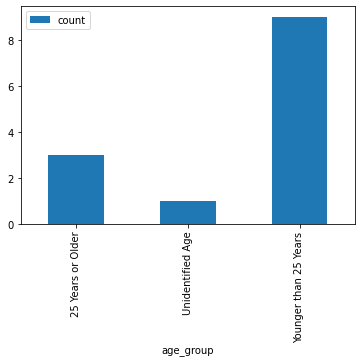

In [8]:
# visualize results to Question 1
q_1.plot.bar(x='age_group')

<b>Question 1 ANSWER</b>
* 3 clients aged 25 years or older at the time in which their cases were opened attended at least one Individual Counseling session in 2019.
* Similarly, 9 clients who were younger than 25 years old when their cases opened attended at least one Individual Counseling session in 2019.
* Finally, at least one Individual Counseling Session was also attended in 2019 by 1 client without an identified age.

#### 1.2 Question 2

<b>2.	How many individuals attended at least one group counseling session in 2019?</b>

In [9]:
# check conditions concerning Question 2 from the prompt
condition_2 = (data['Group Class']==1)&(data['Program Attended']==1)&(data['2019 Program']==1)

# create 'q_2' which outlines Question 2 results
q_2 = data[condition_2].groupby(['Person ID','age_group']).sum()[['count']].reset_index()
q_2['count'] = 1
q_2 = q_2.groupby('age_group').sum()[['count']].reset_index()
q_2

,age_group,count
0,25 Years or Older,8
1,Younger than 25 Years,3


<AxesSubplot:xlabel='age_group'>

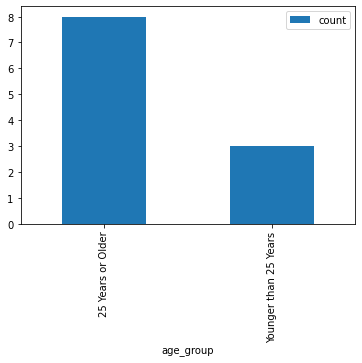

In [10]:
# visualize results to Question 2
q_2.plot.bar(x='age_group')

<b>Question 2 ANSWER</b>
* 8 clients aged 25 years or older at the time in which their cases were opened attended at least one Group Counseling session in 2019.
* Similarly, 3 clients who were younger than 25 years old when their cases opened attended at least one Group Counseling session in 2019.
* Finally, 0 clients with an unidentified age attended any Group Counseling sessions in 2019.

#### 1.3 Question 3

<b>3.	Of the individuals who attended at least one individual counseling session, what is the average number of individual counseling sessions attended by year?</b>

In [11]:
# check conditions concerning Question 3 from the prompt
condition_3 = (data['Individual Counseling']==1)&(data['Program Attended']==1)

# create 'q_3' which outlines Question 3 results
q_3 = data[condition_3].groupby(['Person ID', 'age_group', 'program_year_group']).sum()[['count']].reset_index()

q_3 = q_3.groupby(['age_group', 'program_year_group']).mean().reset_index()
q_3 = q_3.rename(columns={'count':'average'})
q_3

,age_group,program_year_group,average
0,25 Years or Older,2018 Program,3.000000
1,25 Years or Older,2019 Program,6.666667
2,Unidentified Age,2019 Program,3.000000
3,Younger than 25 Years,2018 Program,6.500000
4,Younger than 25 Years,2019 Program,3.333333


<AxesSubplot:xlabel='program_year_group', ylabel='average'>

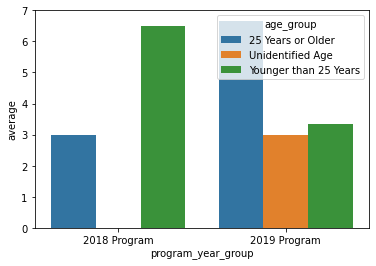

In [12]:
# visualize results to Question 3
sns.barplot(data=q_3, x='program_year_group', y="average", hue="age_group")

<b> Question 3 ANSWER</b>

2018
* In 2018, for clients who were 25 years or older when their cases were opened, the average number of Individual Counseling sessions attended was 3 sessions.
* In 2018, for clients who were younger than 25 years old when their cases were opened, the average number of Individual Counseling sessions attended was 6.5 sessions.

2019
* In 2019, for clients who were 25 years or older when their cases were opened, the average number of Individual Counseling sessions attended was roughly 6.67 sessions.
* Similarly, in 2019, for clients who were younger than 25 years old when their cases were opened, the average number of Individual Counseling sessions attended was roughly 3.33 sessions.
* Finally, in 2019, clients with an unidentified age at the time in which their cases were opened attended, on average, 3 Individual Counseling sessions.

#### 1.4 Question 4

<b>4.	How has the average individual counseling sessions attended changed between 2018 and 2019?</b>

In [13]:
### Question 3 and Question 4 from the prompt have the same conditions, thus  create copy of 'q_3' and call it 'q_4'
q_4 = q_3.copy()

# calculate percent change in Individual Counselng session Attendence from 2018 to 2019 for each age group

# younger than 25
q_4_younger = q_4[q_4['age_group']=='Younger than 25 Years']
q_4_younger['pct_change'] = q_4_younger.average.pct_change()*100
print(q_4_younger)

# 25 or older
q_4_older = q_4[q_4['age_group']=='25 Years or Older']
q_4_older['pct_change'] = q_4_older.average.pct_change()*100
print(q_4_older)

## NOTE: Unidentified Age group only has 2019 attendence for Individual Counseling sessions, thus no percent change can be calculated for this age group

               age_group program_year_group   average  pct_change
3  Younger than 25 Years       2018 Program  6.500000         NaN
4  Younger than 25 Years       2019 Program  3.333333  -48.717949
           age_group program_year_group   average  pct_change
0  25 Years or Older       2018 Program  3.000000         NaN
1  25 Years or Older       2019 Program  6.666667  122.222222


C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


<b>Question 4 ANSWER</b>

Clients 25 Years or Older
* The percent change in Individual Counseling session attendance from 2018 to 2019 for folks aged 25 years or older was roughly 122%  (i.e., [(6.67 - 3) / 3] * 100  = 122.3).

Clients Younger than 25 years
* The percent change in Individual Counseling session attendance from 2018 to 2019 for folks aged younger than 25 years old was roughly -49%  (i.e., [(3.33 - 6.5) / 6.5] * 100  = -48.77).

Clients with an Unidentified Age
* Seeing as clients without an unidentified age did not attend any Individual Counseling sessions in 2018, a percent change for this age group cannot be calculated.

#### 1.5 Question 5

<b>5.	Among closed cases, which individual had the highest group counseling session attendance rate, excluding cancelled sessions?</b>

In [14]:
# check conditions concerning Question 5 from the prompt
condition_5 = (data['Case Confirmed Closed']==1)&(data['Program Attended']==1)&(data['Group Class']==1)

pot_sessions = data[(data['Case Confirmed Closed']==1)&(data['Program Cancelled']==0)&(data['Group Class']==1)].groupby("Person ID").sum()[["count"]].reset_index()
pot_sessions = pot_sessions.rename(columns={"count": "pot_attendence_count"})

q_5 = data[condition_5].groupby("Person ID").sum()[["count"]].reset_index()
q_5 = q_5.rename(columns={"count": "attendence_count"})

# merge 'q_5' and 'pot_sessions'
q_5_m = pd.merge(q_5, pot_sessions, how='left')
q_5_m['attendence_rate'] = q_5_m['attendence_count']/q_5_m['pot_attendence_count']*100

q_5_m.sort_values('attendence_rate', ascending=False)

,Person ID,attendence_count,pot_attendence_count,attendence_rate
2,1000040_00,2,2,100.000000
3,1000050,2,2,100.000000
1,1000020,8,9,88.888889
8,1000210,7,8,87.500000
9,1000220,5,6,83.333333
0,1000010,4,5,80.000000
5,1000120,3,4,75.000000
4,1000100,3,5,60.000000
6,1000170,1,2,50.000000
7,1000200,1,2,50.000000


<b>Question 5 ANSWER</b>

Among closed cases, clients <b>"Road Runner"</b> (Person ID: 1000040_00 (first case); 1000040_01 (second case)) and <b>"Wiley Coyote"</b> (Person ID 1000050) had the highest attendance rates for Group Counseling sessions (i.e., both "Road Runner" and "Wiley Coyote" had attendance rates of 100% for Group Counseling sessions).

Notably, however, client "Road Runner" differs from other clients, because they are associated with more than one case in the dataset.  It is important to note that their first case (concerned with Person ID: 1000040_00) was closed and is associated with a 100% Group Counseling session attendance rate.  However, their second case (concerned with Person ID: 1000040_01), while also closed, has an associated Group Counseling attendance rate of 0%.  While there was only a single Group Counseling session that "Road Runner" could have attended from when their second case was open and closed, they still did end up missing this session, hence contributing to a 0% attendance rate for this case.

#### 1.6 Question 6

<b>6.	Among closed cases, identify the individual(s) that had an individual counseling session attendance rate (excluding cancelled sessions) in the bottom quartile.</b>

In [15]:
# check conditions concerning Question 6 from the prompt
condition_6 = (data['Case Confirmed Closed']==1)&(data['Program Attended']==1)&(data['Individual Counseling']==1)

pot_sessions_6 = data[(data['Case Confirmed Closed']==1)&(data['Program Cancelled']==0)&(data['Individual Counseling']==1)].groupby("Person ID").sum()[["count"]].reset_index()
pot_sessions_6 = pot_sessions_6.rename(columns={"count": "pot_attendence_count"})

q_6 = data[condition_6].groupby("Person ID").sum()[["count"]].reset_index()
q_6 = q_6.rename(columns={"count": "attendence_count"})

# merge 'q_6' with 'pot_sessions'
q_6_m = pd.merge(q_6, pot_sessions_6, how='left')
q_6_m['attendence_rate'] = q_6_m['attendence_count']/q_6_m['pot_attendence_count']*100

q_6_m.quantile

<bound method DataFrame.quantile of      Person ID  attendence_count  pot_attendence_count  attendence_rate
0      1000030                 3                     3       100.000000
1   1000040_00                 5                     5       100.000000
2      1000050                 1                     4        25.000000
3      1000070                 3                     3       100.000000
4      1000090                 2                     5        40.000000
5      1000130                 4                     5        80.000000
6      1000160                 8                    13        61.538462
7      1000170                 4                     5        80.000000
8      1000180                 4                     7        57.142857
9      1000190                 4                     4       100.000000
10     1000200                10                    11        90.909091
11     1000210                 2                     2       100.000000
12     1000220              

In [16]:
# identify clients meeting Question 6 conditions in bottom quartile
bottom_q = q_6_m.attendence_rate.quantile(0.25)
q_6_m_bottom_q = q_6_m[q_6_m['attendence_rate']<=bottom_q]
q_6_m_bottom_q

,Person ID,attendence_count,pot_attendence_count,attendence_rate
2,1000050,1,4,25.000000
4,1000090,2,5,40.000000
8,1000180,4,7,57.142857
12,1000220,1,3,33.333333


<b> Question 6 ANSWER</b>

Among closed cases, clients that had an Individual Counseling Session Attendence Rate that was in the bottom quartile include:

* <b>"Wiley Coyote"</b> (Person ID: 1000050) had an Individual Counseling Session Attendance Rate of 25%.
* <b>"Roger Rabbit"</b> (Person ID: 1000090)	had an Individual Counseling Session Attendance Rate of 40%.
* <b>"Charlie Dog"</b> (Person ID: 1000180) had an Individual Counseling Session Attendance Rate of roughly 57%.
* <b>"Ralph Phillips"</b> (Person ID: 1000220) 	had an Individual Counseling Session Attendance Rate of roughly 33%.

#### 1.7 Question 7

<b>7.	Explain how you would approach summarizing or visually presenting the above findings to program staff.</b>

<b> Question 7 ANSWER</b>

In order to summarize and visually present the above findings to program staff, I would upload the exported data below from this analysis to an Observable Notebook.  Then, with JavaScript, I would prepare data visualization elements (e.g., tables and graphs) which would help communicate the outlined findings per posed question.  In order to help program staff understand and interpret these visualization elements, I would also provide clear and concise text describing the data visualization elements for each posed question.

Once answers to all questions were clearly outlined, I would provide an overall text summary which would summarize all of the findings in all of the posed questions in a simple paragraph.

Given this summary of findings, I would also provide some interpretation as to what these findings may mean for programming.  I would also put forth recommendations for current programming activities and potential future programming activities given the research findings.  In addition, the findings to this research would also allow me to put forth recommendations for future program-supporting research.

Ultimately, this document is a lengthy rough draft of what I would provide to program staff.  

### 2. Preparing Data for Export

In [17]:
# write 'q_1' to a csv
q_1.to_csv('data/processed/q_1.csv', encoding = 'utf-8', index = False)

# write 'q_2' to a csv
q_2.to_csv('data/processed/q_2.csv', encoding = 'utf-8', index = False)

# write 'q_3' to a csv
q_3.to_csv('data/processed/q_3.csv', encoding = 'utf-8', index = False)

# write 'q_4_younger' to a csv
q_4_younger.to_csv('data/processed/q_4_younger.csv', encoding = 'utf-8', index = False)

# write 'q_4_older' to a csv
q_4_older.to_csv('data/processed/q_4_older.csv', encoding = 'utf-8', index = False)

# write 'q_5_m' to a csv
q_5_m.to_csv('data/processed/q_5_m.csv', encoding = 'utf-8', index = False)

# write 'q_6_m' to a csv
q_6_m.to_csv('data/processed/q_6_m.csv', encoding = 'utf-8', index = False)

# write 'q_6_m_bottom_q' to a csv
q_6_m_bottom_q.to_csv('data/processed/q_6_m_bottom_q.csv', encoding = 'utf-8', index = False)